In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Coletando dados

In [ ]:
# lendo arquivo 
PATH = r'/content/drive/MyDrive/DiversiData/Módulo 1/desafio'
clientes = pd.read_excel(PATH + '/dados_clientes.xlsx')
clientes

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
...,...,...,...,...,...
542,543,172.0,207,Masculino,22
543,544,129.0,157,Masculino,1
544,545,107.0,115,Masculino,6
545,546,117.0,147,Masculino,20


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


In [ ]:
estados = pd.read_csv(PATH + '/estados.txt', sep = ';', encoding='latin-1')
estados

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapa,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceara,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espirito Santo,es,Brasil
8,9,Goias,go,Brasil
9,10,Maranhao,ma,Brasil


In [ ]:
idade = pd.read_csv('https://raw.githubusercontent.com/ProfLeandroLessa/desafio-M1-ABD/master/datasets/idade_clientes.csv', sep = ';')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


# Preparação dos dados

## Analisando as variáveis

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_cliente     547 non-null    int64  
 1   peso           542 non-null    float64
 2   colesterol     547 non-null    int64  
 3   genero         547 non-null    object 
 4   id_estado      547 non-null    int64  
 5   genero_number  547 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 25.8+ KB


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


## Analisando dados ausentes

In [ ]:
clientes.isnull().sum()

id_cliente       0
peso             5
colesterol       0
genero           0
id_estado        0
genero_number    0
dtype: int64

In [ ]:
estados.isnull().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
idade.isnull().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
63,64,NaN,211,Masculino,12,1
101,102,NaN,230,Feminino,24,0
146,147,NaN,171,Masculino,23,1
195,196,NaN,143,Feminino,15,0
215,216,NaN,180,Masculino,13,1


In [ ]:
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piaui,pi,NaN
23,24,Santa Catarina,sc,NaN


## Eliminando dados ausentes

In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado,genero_number
count,547.00000,542.000000,547.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638,0.513711
std,158.04957,30.836868,39.147189,7.593117,0.500269
min,1.00000,95.000000,102.000000,1.000000,0.000000
25%,137.50000,116.000000,136.000000,7.000000,0.000000
50%,274.00000,140.000000,169.000000,13.000000,1.000000
75%,410.50000,171.000000,208.000000,20.000000,1.000000
max,547.00000,203.000000,235.000000,27.000000,1.000000


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [ ]:
media_colesterol = clientes.colesterol.mean()
media_colesterol

170.43327239488116

In [ ]:
# Realizando a média e mediana da variável peso
media = clientes.peso.mean()
mediana = clientes.peso.median()
round(media,2) # Fazendo arrendondamento da variável média
print(f"O valor da média dos pesos é:{media}\nO valor da mediana é {mediana}")


O valor da média dos pesos é:143.4409594095941
O valor da mediana é 140.0


In [ ]:
clientes.dropna(subset=['peso'], inplace=True) # retirar valores faltantes
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


## Substituindo variável categórica

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
estados.dropna(subset=['pais'], inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Analisando distribuição dos dados

In [ ]:
import matplotlib.pyplot as plt

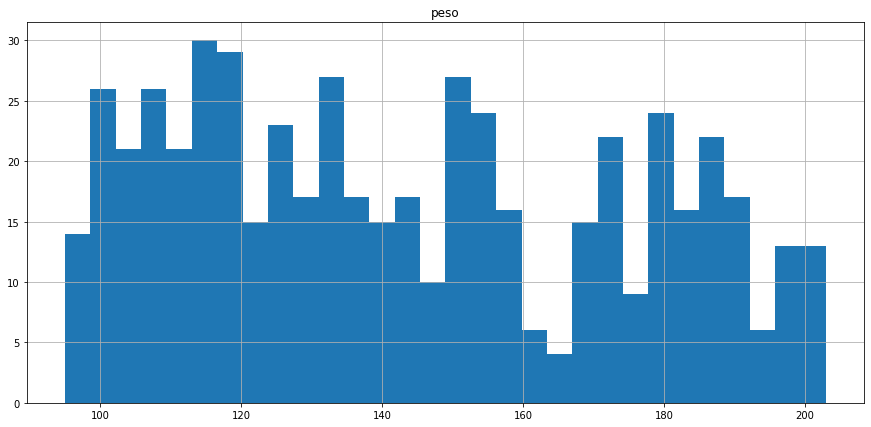

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f865ec78fd0>]],
      dtype=object)

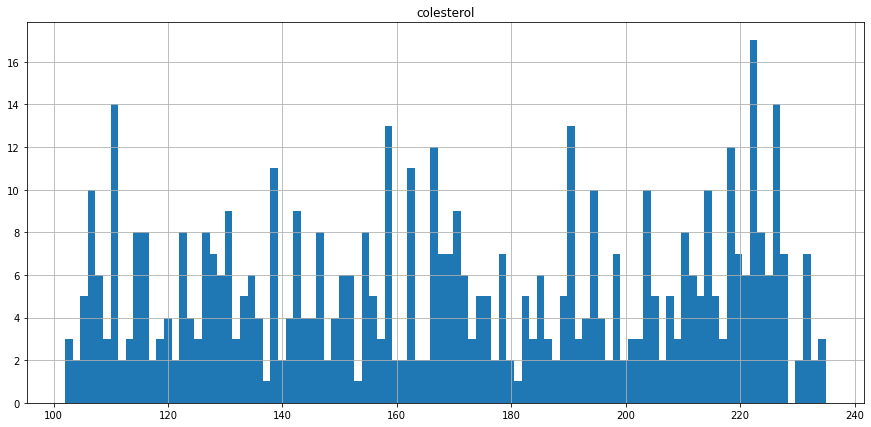

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

# Junção de dados coletados

In [ ]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapa,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceara,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [ ]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
#junção clientes e estados, identificando os estados por cliente
clientes_estados = pd.merge(clientes, estados, on = 'id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espirito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondonia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceara,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
#realização da junção entre cliente e idades
base_completa = pd.merge(clientes_estados, idade, on = 'id_cliente').sort_values('id_cliente')

In [ ]:
base_completa = base_completa.reset_index(drop = True)

In [ ]:
base_completa.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espirito Santo,es,Brasil,17


#Organizando a base de dados

In [ ]:
base_completa.sigla_estado.str.upper()

0      RR
1      DF
2      AM
3      SE
4      ES
       ..
493    RO
494    AC
495    CE
496    RN
497    ES
Name: sigla_estado, Length: 498, dtype: object

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
4,6,198.0,227,Masculino,8,1,Espirito Santo,ES,Brasil,17


## Alterando disposição das colunas

In [ ]:
base_completa[['id_cliente', 'genero', 'genero_number', 'idade', 'peso', 'colesterol', 'id_estado', 'sigla_estado', 'pais']]

,id_cliente,genero,genero_number,idade,peso,colesterol,id_estado,sigla_estado,pais
0,1,Masculino,1,17,102.0,111,23,RR,Brasil
1,2,Masculino,1,28,115.0,135,7,DF,Brasil
2,3,Masculino,1,62,115.0,136,4,AM,Brasil
3,5,Masculino,1,44,130.0,158,26,SE,Brasil
4,6,Masculino,1,17,198.0,227,8,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,1,20,172.0,207,22,RO,Brasil
494,544,Masculino,1,66,129.0,157,1,AC,Brasil
495,545,Masculino,1,36,107.0,115,6,CE,Brasil
496,546,Masculino,1,57,117.0,147,20,RN,Brasil


In [ ]:
base_completa = base_completa[['id_cliente', 'genero', 'genero_number', 'idade', 'peso', 'colesterol', 'id_estado', 'sigla_estado', 'pais']]

# Aplicando métodos

## Cotovelo

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_clientes):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X = dados_clientes)        
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
dados_clientes = base_completa[['peso', 'colesterol']]
dados_clientes

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227
...,...,...
493,172.0,207
494,129.0,157
495,107.0,115
496,117.0,147


In [ ]:
wcss_cliente = calcular_wcss(dados_clientes)

In [ ]:
for i in range(len(wcss_cliente)):
   print(f'O Cluster {i} possui valor de WCSS de: {wcss_cliente[i]}')


O Cluster 0 possui valor de WCSS de: 1248240.6686746986
O Cluster 1 possui valor de WCSS de: 298932.7377352369
O Cluster 2 possui valor de WCSS de: 127842.60787249672
O Cluster 3 possui valor de WCSS de: 73809.93553059456
O Cluster 4 possui valor de WCSS de: 49068.8738718445
O Cluster 5 possui valor de WCSS de: 34064.50002100837
O Cluster 6 possui valor de WCSS de: 25079.92393550797
O Cluster 7 possui valor de WCSS de: 20378.05126656164
O Cluster 8 possui valor de WCSS de: 16003.657266380145
O Cluster 9 possui valor de WCSS de: 13385.38391038145


In [ ]:
wcss_cliente[5]

34064.50002100837

## Visualizando o gráfico do cotovelo

In [ ]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [ ]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_cliente
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_clientes)
base_completa

,id_cliente,genero,genero_number,idade,peso,colesterol,id_estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,1,17,102.0,111,23,RR,Brasil,2,NaN
1,2,Masculino,1,28,115.0,135,7,DF,Brasil,2,Baixo Risco
2,3,Masculino,1,62,115.0,136,4,AM,Brasil,2,Baixo Risco
3,5,Masculino,1,44,130.0,158,26,SE,Brasil,1,Alto Risco
4,6,Masculino,1,17,198.0,227,8,ES,Brasil,0,Risco Moderado alto
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,1,20,172.0,207,22,RO,Brasil,0,Risco Moderado baixo
494,544,Masculino,1,66,129.0,157,1,AC,Brasil,1,Alto Risco
495,545,Masculino,1,36,107.0,115,6,CE,Brasil,2,NaN
496,546,Masculino,1,57,117.0,147,20,RN,Brasil,1,Baixo Risco


## Calcula os centroides de cada cluster

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [ ]:
dados_clientes

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227
...,...,...
493,172.0,207
494,129.0,157
495,107.0,115
496,117.0,147


In [ ]:
grafico = px.scatter(x = base_completa['peso'], 
                            y = base_completa['colesterol'], 
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

Função para gerar gráficos

In [ ]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x, 
                      y = y, 
                      color= base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,                  
                    ) 

  fig.show()

# Segmentando os clientes baseado na análise dos clusters

In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [ ]:
cluster_clientes = base_completa

In [ ]:
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Risco Moderado alto'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Risco Moderado baixo'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Baixo Risco'

In [ ]:
cluster_clientes.head()

,id_cliente,genero,genero_number,idade,peso,colesterol,id_estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,1,17,102.0,111,23,RR,Brasil,2,Risco Moderado baixo
1,2,Masculino,1,28,115.0,135,7,DF,Brasil,2,Risco Moderado baixo
2,3,Masculino,1,62,115.0,136,4,AM,Brasil,2,Risco Moderado baixo
3,5,Masculino,1,44,130.0,158,26,SE,Brasil,1,Risco Moderado alto
4,6,Masculino,1,17,198.0,227,8,ES,Brasil,0,Alto Risco


In [ ]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo Risco,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado alto,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0
Risco Moderado baixo,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado alto,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0
Risco Moderado baixo,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado alto,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0
Risco Moderado baixo,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Baixo Risco          Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Risco Moderado alto  Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Baixo Risco          Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Risco Moderado alto  Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

In [ ]:
cluster_clientes.query('nome_cluster == "Risco Moderado alto" & genero == "Feminino"').describe()

,id_cliente,genero_number,idade,peso,colesterol,id_estado,cluster
count,58.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.0
mean,256.431034,0.0,42.172414,108.396552,122.448276,12.724138,2.0
std,157.180990,0.0,15.152023,6.472451,10.372319,7.100267,0.0
min,11.000000,0.0,20.000000,96.000000,102.000000,2.000000,2.0
25%,126.500000,0.0,29.250000,104.000000,113.000000,7.000000,2.0
50%,249.500000,0.0,41.000000,110.000000,124.500000,11.500000,2.0
75%,370.750000,0.0,50.750000,113.000000,130.000000,19.000000,2.0
max,539.000000,0.0,70.000000,118.000000,138.000000,27.000000,2.0
